<a href="https://colab.research.google.com/github/NyashaNziramasanga/Masters-of-Computer-Science/blob/master/2021-Semester-2/COMP8715-heuristic-optimisation/Week6-svm/COMP2712_SVMs_and_Softer_Margins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP2712 SVMs and Softer Margins

This notebook has been adapted from: [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)


## Import Modules

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.metrics import classification_report
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets import make_blobs

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Create some functions

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,facecolors='none',edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Soft(er) Margins: Life is not always so hard

Well, in fact life is hard and that is why the hard margins (no errors) are not always acceptable and real data is messy and errors can be from 
- label error – maybe human error -> large outliers
- attribute error – small measurement imprecision
- noise error – variable unmodelled/unwanted factors
- model error – distributions overlap -> not separable

So, we need to have "softer" margins that allow some errors.  This is the role of the capacity parameter `C` which controls the trade-off between error and margin.   For very large `C`, the margin is hard, and points cannot lie in it. For smaller `C`, the margin is softer, and can grow to encompass some points.  The plots below show some blobs that overlap in distribution.  A hard margin would not be able to classify this, so a smaller value of `C`, or softer margin is required.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.92      0.92      0.92        13

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



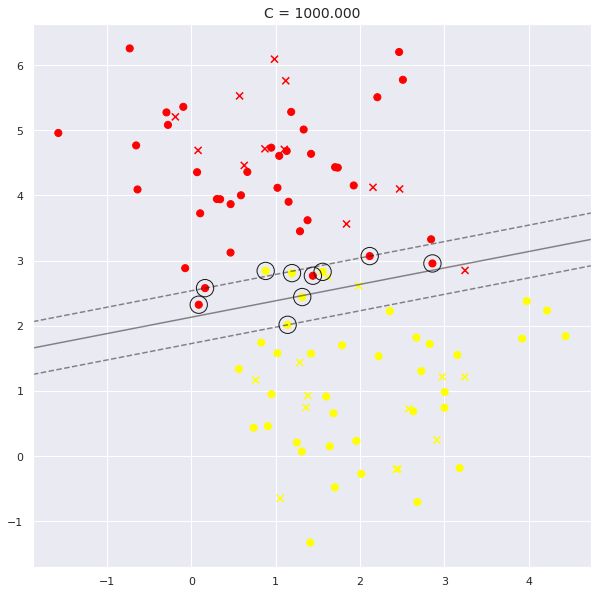

In [ ]:
from sklearn.model_selection import train_test_split

# how much overlap, bigger number -> more overlap
cluster_std=1.0

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=cluster_std)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=142,stratify=y)

C = 1000 ## Change this C value, small values -> soft, large values -> hard
model = SVC(kernel='linear', C=C).fit(Xtrain, ytrain)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, s=50, cmap='autumn')
ax = plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=50, cmap='autumn',marker='x')
plot_svc_decision_function(model)
plt.title('C = {0:.3f}'.format(C), size=14);

y_pred = model.predict(Xtest)
report = classification_report(ytest, y_pred)
print(report)

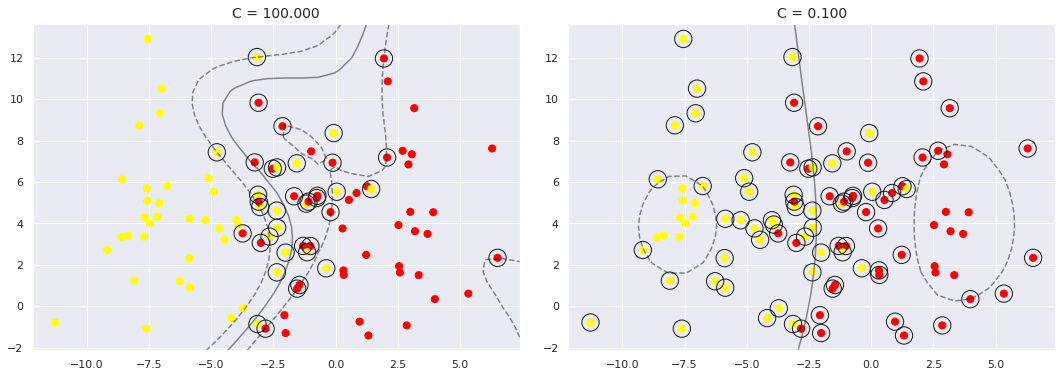

In [ ]:

from sklearn.datasets import make_moons

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=80, cluster_std=3)
#X, y = make_moons(n_samples=100, noise=.75, random_state=123)
#X, y = make_circles(100, factor=.1, noise=.75)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.3f}'.format(C), size=14)

### TASK 3
Find a value of `C` that gives the best classification (f1-score) for this data set.  To make this a bit more challening the SVM model is trained with a training split and evaluated on a test split.  The `random_state` is set to `142` to make the comparisons fairer (the split will always be the same).

              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.38      0.60      0.46        10

    accuracy                           0.44        25
   macro avg       0.47      0.47      0.44        25
weighted avg       0.48      0.44      0.43        25



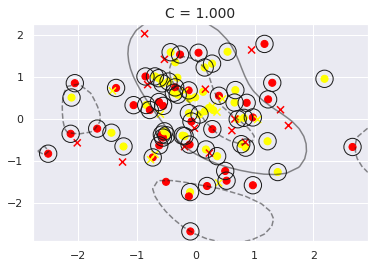

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=142)

C = 1 ## Change this C value
model = SVC(kernel='rbf', C=C).fit(Xtrain, ytrain)
ax = plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, s=50, cmap='autumn')
ax = plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=50, cmap='autumn',marker='x')
plot_svc_decision_function(model)
plt.title('C = {0:.3f}'.format(C), size=14);

y_pred = model.predict(Xtest)
report = classification_report(ytest, y_pred)
print(report)